In [1]:
# Verify installation - 
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.3.0
Keras Version: 2.4.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [57]:
# 1 D array
data = np.asarray([5])
print(data)
data.shape

[5]


(1,)

In [58]:
# 2 D Array
data = np.asarray([[0,1],[2,3]])
print(data)
data.shape

[[0 1]
 [2 3]]


(2, 2)

In [61]:
# 3D Array
data = np.asarray([[[0,1,0,1,1],[2,2,4,2,3],[4,4,2,4,5]]])
print(data)
data.shape

[[[0 1 0 1 1]
  [2 2 4 2 3]
  [4 4 2 4 5]]]


(1, 3, 5)

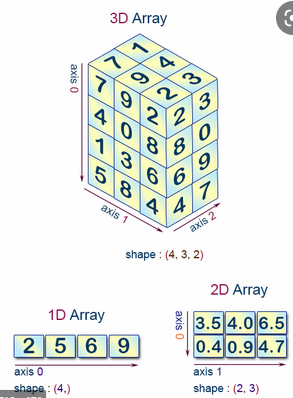

In [4]:
import numpy as np
from numpy import asarray

data = [[3,3,2,1,0],
		[0,0,1,3,1],
		[3,1,2,2,3],
		[2,0,0,2,2],
		[2,0,0,0,1]]
data = np.asarray(data)
data = data.reshape(1, 5, 5, 1)

kernel = [[[[0]],[[1]],[[2]]],
            [[[2]],[[2]],[[0]]],
            [[[0]],[[1]],[[2]]]]
weights = [asarray(kernel), asarray([0.0])]

In [44]:
data.shape

(1, 5, 5, 1)

In [5]:
data

array([[[[3],
         [3],
         [2],
         [1],
         [0]],

        [[0],
         [0],
         [1],
         [3],
         [1]],

        [[3],
         [1],
         [2],
         [2],
         [3]],

        [[2],
         [0],
         [0],
         [2],
         [2]],

        [[2],
         [0],
         [0],
         [0],
         [1]]]])

In [6]:
kernel

[[[[0]], [[1]], [[2]]], [[[2]], [[2]], [[0]]], [[[0]], [[1]], [[2]]]]

In [7]:
weights

[array([[[[0]],
 
         [[1]],
 
         [[2]]],
 
 
        [[[2]],
 
         [[2]],
 
         [[0]]],
 
 
        [[[0]],
 
         [[1]],
 
         [[2]]]]),
 array([0.])]

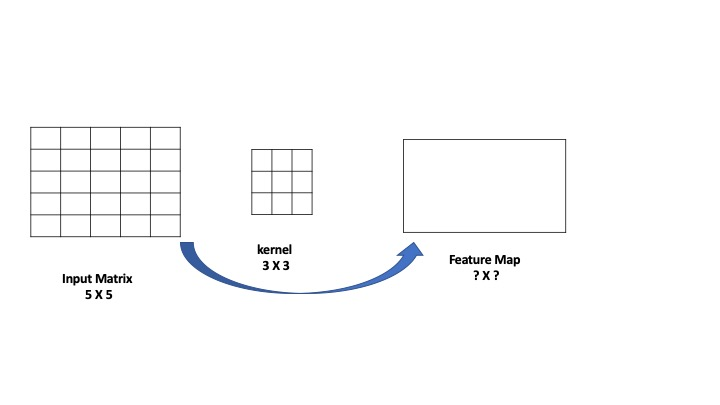

In [8]:
model = models.Sequential()
# 1 2 D convoultion filter 3 x 3 shape, 5 x 5 single channel as input.
model.add(layers.Conv2D(1, (3, 3),  input_shape=(5, 5, 1)))
# Here we can see output is 3x3 How?- #output shape calculation
#[input- Kernal size] +1 ==> [5-3]+1 ==> 2+1 = 3
# total_params = (filter_height * filter_width * input_image_channels + 1) * number_of_filters
# (3x3x1 +1) * 1 =(9+1)*1 => 10
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[12.0, 12.0, 17.0]
[10.0, 17.0, 19.0]
[9.0, 6.0, 14.0]


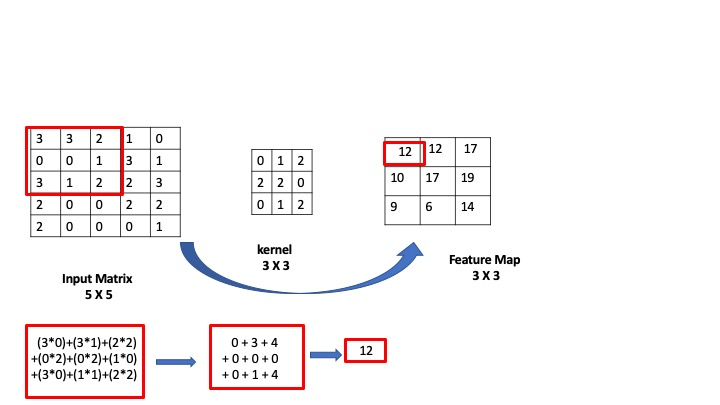

## 3 Channels

In [37]:
# Single filter
model = models.Sequential()
# 32 2D convoultion filter 3 x 3 shape, 5 x 5 Three channel as input.
model.add(layers.Conv2D(1, (3, 3),  input_shape=(5, 5, 3)))
# Here we can see output is 3x3 How?
#[input- Kernal size] +1 ==> [5-3]+1 ==> 2+1 = 3x 3
# total_params = (filter_height * filter_width * input_image_channels + 1(bias)) * number_of_filters
# (3x3x3 +1) * 1 =(27+1)*1 => 10
model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 3, 3, 1)           28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


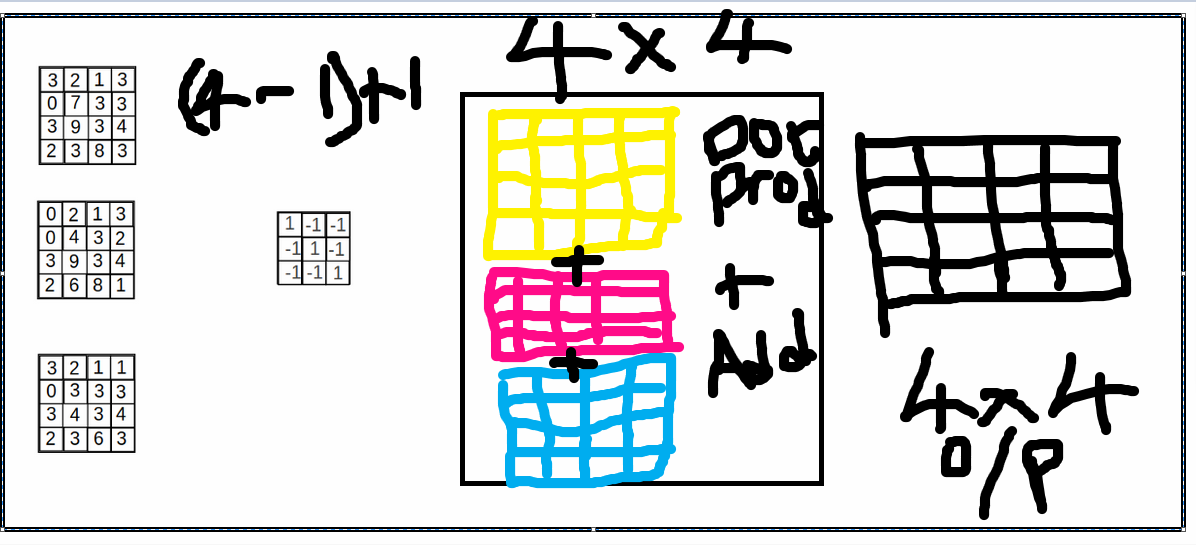

In [46]:
# 32 filter
model = models.Sequential()
# 32 2D convoultion filter 3 x 3 shape, 5 x 5 Three channel as input.
model.add(layers.Conv2D(32, (3, 3),  input_shape=(5, 5, 3)))
# Here we can see output is 3x3 How?
#[input- Kernal size] +1 ==> [5-3]+1 ==> 2+1 = 3
## use_bias=False then no add 1. By default it is True
# total_params = (filter_height * filter_width * input_image_channels + 1(bias)) * number_of_filters
# (3x3x3 +1) * 32 =(27+1)* 32 => 28*36 => 896
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 3, 3, 32)          896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


## Understanding the dimentional

In [77]:
# 1 x 1 3 dimentional  3 numbers
import random
randomlist = random.sample(range(1, 10),9)
data = np.asarray(randomlist)
data = data.reshape(3, 1, 1, 3)
print(data)
print(data.shape)

[[[[3 5 9]]]


 [[[8 4 6]]]


 [[[2 7 1]]]]
(3, 1, 1, 3)


In [78]:
# 5 x 5 3 dimentional  5 numbers
import random
randomlist = random.sample(range(1, 300),225)
data = np.asarray(randomlist)
data = data.reshape(3, 5, 5, 3)
print(data)
print(data.shape)

[[[[274 261 120]
   [ 80 126 139]
   [160 264 181]
   [114 143  30]
   [259  53   1]]

  [[ 89 231 177]
   [185  76 198]
   [284 208 248]
   [285 155 245]
   [225 297 135]]

  [[ 55  23 275]
   [294  91 161]
   [292  96  33]
   [ 49 100 189]
   [ 42 229 122]]

  [[152 137  72]
   [ 25  28 293]
   [286 154  79]
   [199  74  47]
   [244 146 269]]

  [[ 59 209  98]
   [ 54 133  84]
   [218 124 172]
   [197  29   4]
   [241 249 111]]]


 [[[ 68 278 116]
   [140  41 273]
   [142  16  71]
   [206  93  44]
   [157  13 164]]

  [[260  56 281]
   [ 62 119 109]
   [287  43  34]
   [ 88 217 299]
   [270 167  64]]

  [[246 216  46]
   [175  97 127]
   [ 19 188  83]
   [234 258 153]
   [ 18 202  67]]

  [[ 99 295  65]
   [112 227 194]
   [210 298  61]
   [  8 106 115]
   [ 31 144  51]]

  [[168  77   3]
   [220  32  12]
   [130 158  94]
   [141 117  81]
   [252  90 224]]]


 [[[ 73 184 236]
   [148 265 235]
   [159 289 213]
   [290 271 214]
   [ 22 280 186]]

  [[ 58 254  27]
   [ 78 169 219]
   [2

## 3 channel - 3D Convolutional

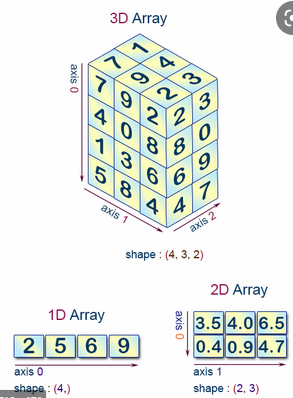

In [50]:
model = models.Sequential()
# 1 3D convoultion filter 3 x 3 shape, 5 x 5 Three channel as input.
# Length,Breadth,Height,Channel( RGB)
model.add(layers.Conv3D(1, (3, 3,3),  input_shape=(3,5, 5, 3)))
# Here we can see output is 3x3 How?
#[input- Kernal size] +1 ==> [5-3]+1 ==> 2+1 = 3x3 for one channel-> 9 parameter
# total_params =  (Dimension[filter_height * filter_width * input_image_channels] + 1) * number_of_filters
# (3[3x3x3 ]+1)] * 1 = (3[27]+1)x1 => (81+1)x1 => 82
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_5 (Conv3D)            (None, 1, 3, 3, 1)        82        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


In [79]:
model = models.Sequential()
# 1 3D convoultion filter 3 x 3 shape, 5 x 5 Three channel as input.
# Length,Breadth,Height,Channel( RGB)
model.add(layers.Conv3D(3, (3, 3,3),  input_shape=(3,5, 5, 3)))
# Here we can see output is 3x3 How?
#[input- Kernal size] +1 ==> [5-3]+1 ==> 2+1 = 3x3 for one channel-> 9 parameter
# total_params =  (Dimension[filter_height * filter_width * input_image_channels] + 1) * number_of_filters
# (3[3x3x3 ]+1)] * 3 = (3[27]+1)x 3 => (81+1)x 3 => 82x3 => 246
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_6 (Conv3D)            (None, 1, 3, 3, 3)        246       
Total params: 246
Trainable params: 246
Non-trainable params: 0
_________________________________________________________________


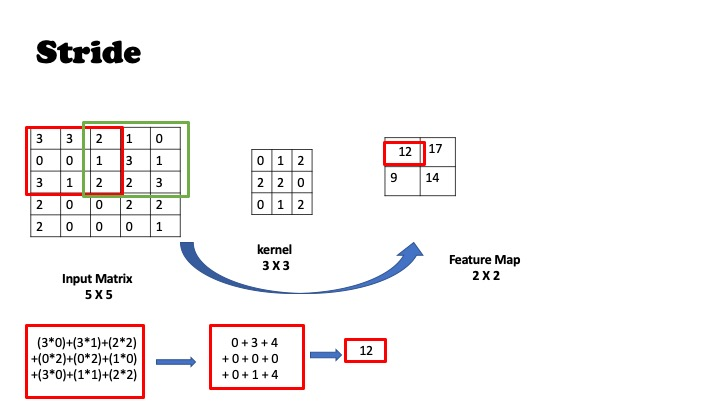

In [12]:
model = models.Sequential()
# 1 2 D convoultion filter 3 x 3 shape, 5 x 5 single channel as input.
model.add(layers.Conv2D(1, (3, 3),  strides=(2, 2),input_shape=(5, 5, 1)))
# Here we can see output is 3x3 How?
#[(input- Kernal size)/Strid] +1 ==> [(5-3)/2]+1 ==> (2/2)+1 = 1 x 1
# How 10 parameter 3 x 3 = 9 + 1 bias for single channel
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 2, 2, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[12.0, 17.0]
[9.0, 14.0]


### 3 channel

In [14]:
model = models.Sequential()
# 64 2 D convoultion filter 3 x 3 shape, 5 x 5 single channel as input & Strids 2
model.add(layers.Conv2D(1, (3, 3),  strides=(2, 2),input_shape=(5, 5, 3)))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 2, 2, 1)           28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [15]:
model = models.Sequential()
# 64 2 D convoultion filter 3 x 3 shape, 5 x 5 single channel as input & Strids 2
model.add(layers.Conv2D(64, (3, 3),  strides=(2, 2),input_shape=(5, 5, 3)))
# Here we can see output is 3x3 How?
#[(input- Kernal size)/Strid] +1 ==> [(5-3)/2]+1 ==> (2/2)+1 = 1 x 1
# How these parameter 3 x 3 = 9, 3x 3 = 9, 3 x 3 =9  and + 1 bias   => 28
# 28x 64 = 1792
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 2, 2, 64)          1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


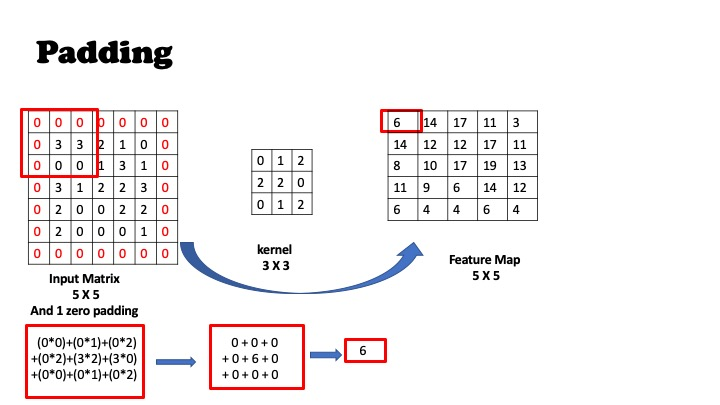

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), padding='same', strides=(1,1),input_shape=(5, 5, 1)))
model.summary()
##output shape calculation
#[(input- Kernal size)+2 * Padding/Strid] +1 ==> [(5-3)+(2*1)/1]+1 ==> (2+2/1)+1 = 5 x 5
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 5, 5, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[6.0, 14.0, 17.0, 11.0, 3.0]
[14.0, 12.0, 12.0, 17.0, 11.0]
[8.0, 10.0, 17.0, 19.0, 13.0]
[11.0, 9.0, 6.0, 14.0, 12.0]
[6.0, 4.0, 4.0, 6.0, 4.0]


In [17]:
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), padding='same', strides=(2,2),input_shape=(5, 5, 1)))
model.summary()
#output shape calculation
#[(input- Kernal size)+2 * Padding/Strid] +1 ==> [(5-3)+(2*1)/2]+1 ==> (2+2/2)+1 = 3 x3
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 3, 3, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[6.0, 17.0, 3.0]
[8.0, 17.0, 13.0]
[6.0, 4.0, 4.0]


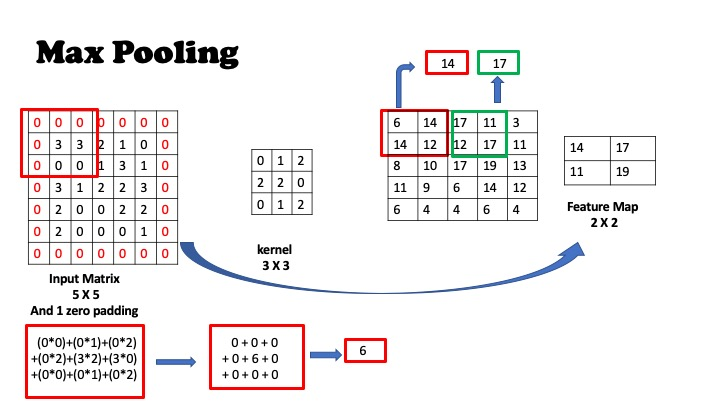

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), padding='same', strides=(1,1),input_shape=(5, 5, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.summary()
#output shape calculation
#[(input- Kernal size)+2 * Padding/Strid] +1 ==> [(5-3)+(2*1)/1]+1 ==> (2+2/1)+1 = 4+1 => 5 x5
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 5, 5, 1)           10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[14.0, 17.0]
[11.0, 19.0]


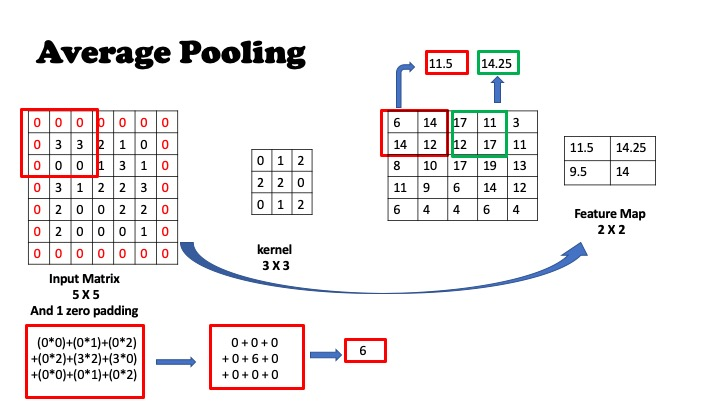

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), padding='same', strides=(1,1),input_shape=(5, 5, 1)))
model.add(layers.AveragePooling2D((2, 2)))

model.summary()
#output shape calculation
#[(input- Kernal size)+2 * Padding/Strid] +1 ==> [(5-3)+(2*1)/1]+1 ==> (2+2/1)+1 = 4+1 => 5 x5
model.set_weights(weights)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 5, 5, 1)           10        
_________________________________________________________________
average_pooling2d (AveragePo (None, 2, 2, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[11.5, 14.25]
[9.5, 14.0]


## Flatten

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), padding='same', strides=(1,1),input_shape=(5, 5, 1)))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Flatten())
model.summary()
#output shape calculation
#[(input- Kernal size)+2 * Padding/Strid] +1 ==> [(5-3)+(2*1)/1]+1 ==> (2+2/1)+1 = 4+1 => 5 x5


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 5, 5, 1)           10        
_________________________________________________________________
average_pooling2d_1 (Average (None, 2, 2, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 4)                 0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


## Basic 3  Channel Example

In [21]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [36]:
print(train_images.shape)

(50000, 32, 32, 3)


In [35]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

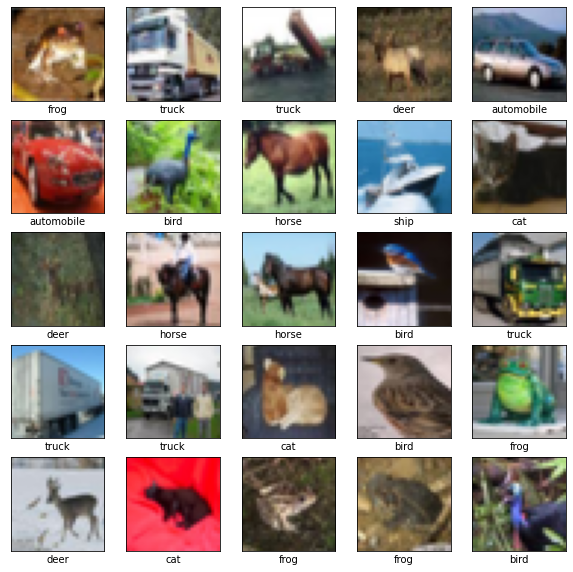

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [23]:
# input one 32x 32 pixel , 3 dimention and  2-D Convolution applied means 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # o/P: (32-3)+1 =>29+1 => 30 X 30
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # o/P: (30-3)+1 =>27+1 => 28 X 28
model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        9248      
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [24]:
# After two convoultion apply max pooling
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # o/P: (32-3)+1 =>29+1 => 30 X 30
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # o/P: (30-3)+1 =>27+1 => 28 x 30
model.add(layers.MaxPooling2D((2, 2))) # Max pooling 28/2 = > 14 x 14 
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Apply one more CNN & Increase kernal
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # o/P: (14-3)+1 =>12+1 => 12 x 12
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # o/P: (12-3)+1 =>9+1 => 10 x10
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 64)        36928     
Total params: 65,568
Trainable params: 65,568
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.add(layers.MaxPooling2D((2, 2))) # Max pooling 10/2 = > 5 x 5
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 65,568
Trainable params: 65,568
Non-trainable params: 0
_________________________________________________

### Flatten

In [29]:
# Passs the Pooled feature map(Identified) into flatten
model.add(layers.Flatten())
# Pass to activation
model.add(layers.Dense(64, activation='relu'))
# Add output layer ( Here the picture has 10 classification , So we have 10 neuroun at output stage)
model.add(layers.Dense(10))


In [30]:
# Fit the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 181s 115ms/step - loss: 1.5480 - accuracy: 0.4273 - val_loss: 1.2735 - val_accuracy: 0.5424
Epoch 2/10
1563/1563 [==============================] - 172s 110ms/step - loss: 1.1029 - accuracy: 0.6058 - val_loss: 1.0832 - val_accuracy: 0.6220
Epoch 3/10
1563/1563 [==============================] - 175s 112ms/step - loss: 0.9210 - accuracy: 0.6743 - val_loss: 0.8644 - val_accuracy: 0.6936
Epoch 4/10
1563/1563 [==============================] - 180s 115ms/step - loss: 0.7907 - accuracy: 0.7241 - val_loss: 0.8621 - val_accuracy: 0.7012
Epoch 5/10
1563/1563 [==============================] - 175s 112ms/step - loss: 0.7138 - accuracy: 0.7488 - val_loss: 0.8173 - val_accuracy: 0.7197
Epoch 6/10
1563/1563 [==============================] - 172s 110ms/step - loss: 0.6457 - accuracy: 0.7749 - val_loss: 0.8064 - val_accuracy: 0.7306
Epoch 7/10
1563/1563 [==============================] - 176s 113ms/step - loss: 0.5971 - accuracy: 0.7917 - val_

313/313 - 8s - loss: 0.8565 - accuracy: 0.7279


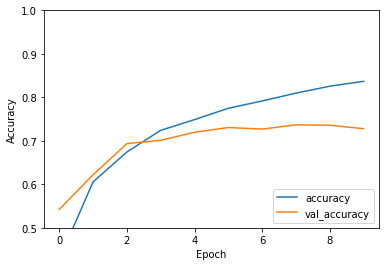

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [32]:
print(test_acc)


0.7279000282287598


In [ ]:
Thanks to Binod Suman Academy YouTube Videos